**Weather Analysis**

All statements are valid for the end of March 2018. During another time of a year significant changes may occur.
1. There is significantly more cities located in a Northern Hemisphere. Temperature vs Latitude plot shows a direct correlation between a distance from the equator with a temperature. The farther the city is located from the equator, the colder weather is there. Some outliers are possible on low latitudes - high mountains cities, where the temperatures are lower than the average for this latitude.
2. The correlation between Latitude and Humidity is not so obvious, but there is a trend that Humidity is 30% higher on the equator (from -20° S to 10° N). Also, the less humid regions can be found from 10° N to 50° N.
3. There is no dependence observed between Latitude and Cloudiness. There is a slight increase in wind speed as a distance from the equator increases. Also, it can be mentioned, that winds are insignificantly stronger in a Northern Hemisphere, probably because the inhabited territory is much larger.

In [1]:
import requests
import pandas as pd
import random
import openweathermapy.core as owm
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import seaborn as sns
from citipy import citipy
from pprint import pprint
from config import api_key

**Create a list of random cities**

# this code kills the kernel, what I did wrong?
cities = {}

def onemoreloop():
    return citylistcreator()

def citylistcreator():
    for x in range(500):
        coord = ((round(random.uniform(-90.00, 90.00),2)),(round(random.uniform(-180.00, 180.00),2)))
        citydata = citipy.nearest_city(*coord)
        city = citydata.city_name
        if city not in cities:
            cities[city] = coord
        else:
            try:
                return onemoreloop()
            except(RecursionError):
                return onemoreloop()

citylistcreator()
print(len(cities))

**This works fine, but the output number of cities is unpredictable**

In [2]:
cities = {}

for x in range(2000):
    coord = ((round(random.uniform(-90.00, 90.00),2)),(round(random.uniform(-180.00, 180.00),2)))
    citydata = citipy.nearest_city(*coord)
    city = citydata.city_name
    #if city not in cities: Not necessary, because of using dictionary
        #cities[city] = coord
    #else:
        #pass
    cities[city] = coord # Coordinates are added to be able to look up based on them, for debugging

print(len(cities))

755


**Retrieve cities data from openweathermap using Requests**

In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

all_requests_data = {}
counter = 1 # City number counter
absent_cities_req = 0 # Counter for the cities that are not in the openweather database

for city in cities:
    
    pure_city_name = city
    city = requests.utils.quote(city, safe='') # Make a city name readable (percent-encoded)
    ind_url = f'{url}appid={api_key}&units={units}&q={city}'
    # The line below is blocked, not to show the api_key
    #print(f'Now processing: city number {counter}, name {pure_city_name}\n{ind_url}')
    print(f'Now processing: city number {counter}, name {pure_city_name}')
    data_json = requests.get(ind_url).json()
    
    try:
        all_requests_data[data_json['name']] = [data_json['sys']['country'], data_json['coord']['lat'], 
                                              data_json['main']['temp'], data_json['main']['humidity'],
                                              data_json['clouds']['all'], data_json['wind']['speed'], data_json['dt']]
    except(KeyError):
        print(f'There is no city {pure_city_name} in openweathermap database')
        absent_cities_req +=1
        continue
    counter += 1
    
print(f'{absent_cities_req} cities were skipped')
print(f'{len(all_requests_data)} cities data was captured')

Now processing: city number 1, name georgetown
Now processing: city number 2, name honningsvag
Now processing: city number 3, name kieta
Now processing: city number 4, name lebu
Now processing: city number 5, name provideniya
Now processing: city number 6, name lavrentiya
Now processing: city number 7, name olinda
Now processing: city number 8, name rikitea
Now processing: city number 9, name maldonado
Now processing: city number 10, name pevek
Now processing: city number 11, name hilo
Now processing: city number 12, name acapulco
Now processing: city number 13, name mataura
Now processing: city number 14, name isangel
Now processing: city number 15, name klaksvik
Now processing: city number 16, name tasiilaq
Now processing: city number 17, name belushya guba
There is no city belushya guba in openweathermap database
Now processing: city number 17, name kapaa
Now processing: city number 18, name valparaiso
Now processing: city number 19, name longyearbyen
Now processing: city number 20,

Now processing: city number 146, name iqaluit
Now processing: city number 147, name kattivakkam
Now processing: city number 148, name barra do bugres
Now processing: city number 149, name natal
Now processing: city number 150, name saint-philippe
Now processing: city number 151, name lubumbashi
Now processing: city number 152, name saint-joseph
Now processing: city number 153, name yabelo
Now processing: city number 154, name moron
Now processing: city number 155, name amsterdam
Now processing: city number 156, name ermelo
Now processing: city number 157, name ust-ishim
Now processing: city number 158, name puerto madryn
Now processing: city number 159, name okha
Now processing: city number 160, name coihueco
Now processing: city number 161, name tuktoyaktuk
Now processing: city number 162, name oussouye
Now processing: city number 163, name lukovetskiy
Now processing: city number 164, name henties bay
Now processing: city number 165, name lososina
Now processing: city number 166, name

Now processing: city number 287, name naftah
There is no city naftah in openweathermap database
Now processing: city number 287, name dubuque
Now processing: city number 288, name aripuana
Now processing: city number 289, name cidreira
Now processing: city number 290, name ahipara
Now processing: city number 291, name bajo baudo
There is no city bajo baudo in openweathermap database
Now processing: city number 291, name axim
Now processing: city number 292, name kodiak
Now processing: city number 293, name ribeira grande
Now processing: city number 294, name nakamura
Now processing: city number 295, name necochea
Now processing: city number 296, name play cu
There is no city play cu in openweathermap database
Now processing: city number 296, name payson
Now processing: city number 297, name salinopolis
Now processing: city number 298, name waterloo
Now processing: city number 299, name sorong
Now processing: city number 300, name taitung
Now processing: city number 301, name maumere
No

Now processing: city number 418, name kuala krai
There is no city kuala krai in openweathermap database
Now processing: city number 418, name songea
Now processing: city number 419, name copiapo
Now processing: city number 420, name itarantim
Now processing: city number 421, name zeya
Now processing: city number 422, name hanyang
Now processing: city number 423, name awjilah
Now processing: city number 424, name dekar
Now processing: city number 425, name vangaindrano
Now processing: city number 426, name naze
Now processing: city number 427, name saint-augustin
Now processing: city number 428, name kindu
Now processing: city number 429, name nan
Now processing: city number 430, name kitimat
Now processing: city number 431, name flin flon
Now processing: city number 432, name owosso
Now processing: city number 433, name skopelos
Now processing: city number 434, name louisbourg
There is no city louisbourg in openweathermap database
Now processing: city number 434, name araouane
Now proc

Now processing: city number 553, name samalaeulu
There is no city samalaeulu in openweathermap database
Now processing: city number 553, name rumonge
Now processing: city number 554, name makakilo city
Now processing: city number 555, name houma
Now processing: city number 556, name himora
There is no city himora in openweathermap database
Now processing: city number 556, name syracuse
Now processing: city number 557, name harrisburg
Now processing: city number 558, name ust-omchug
Now processing: city number 559, name kazalinsk
There is no city kazalinsk in openweathermap database
Now processing: city number 559, name kaabong
Now processing: city number 560, name padang
Now processing: city number 561, name zhezkazgan
Now processing: city number 562, name burns lake
Now processing: city number 563, name asau
There is no city asau in openweathermap database
Now processing: city number 563, name north bend
Now processing: city number 564, name kintampo
Now processing: city number 565, n

**Create a DataFrame based on Requests data**

In [4]:
dframe_json = pd.DataFrame(all_requests_data)
final_req_df = dframe_json.transpose()
final_req_df.columns = ['Country', 'Latitude', 'Temperature(F)', 'Humidity(%)', 'Cloudiness(%)', 'Wind Speed(MpH)',
                        'Date']
final_req_df.to_csv('Output/Weather_requests.csv')
print(final_req_df.count())
final_req_df.head()

Country            670
Latitude           670
Temperature(F)     670
Humidity(%)        670
Cloudiness(%)      670
Wind Speed(MpH)    670
Date               670
dtype: int64


,Country,Latitude,Temperature(F),Humidity(%),Cloudiness(%),Wind Speed(MpH),Date
Abdulino,RU,53.68,32.83,100,88,12.1,1522262461
Abiramam,IN,9.44,84.2,70,20,7.96,1522260000
Acajutla,SV,13.59,91.4,63,20,5.82,1522259400
Acapulco,MX,16.86,84.2,66,5,5.82,1522258800
Achacachi,BO,-16.04,52.63,67,48,4.38,1522262509


**Retrieve cities data from openweathermap using openweathermapy**

**Here and below I use metric system because Farenheits sound like Sanskrit for me**

In [5]:
settings = {"units": "metric", "appid": api_key} 

In [8]:
import urllib

all_owm_data = []
absent_cities_owm = 0

for city in cities:
    try:
        all_owm_data.append(owm.get_current(city, **settings))
    except urllib.error.HTTPError:
        print(f'There is no city {city} in openweathermap database')
        absent_cities_owm += 1
        continue
        
print(f'{absent_cities_owm} cities were skipped')
print(f'{len(all_owm_data)} cities data was captured')

There is no city belushya guba in openweathermap database
There is no city sentyabrskiy in openweathermap database
There is no city ascension in openweathermap database
There is no city barentsburg in openweathermap database
There is no city taolanaro in openweathermap database
There is no city amderma in openweathermap database
There is no city illoqqortoormiut in openweathermap database
There is no city sakakah in openweathermap database
There is no city marv dasht in openweathermap database
There is no city olafsvik in openweathermap database
There is no city one hundred mile house in openweathermap database
There is no city mys shmidta in openweathermap database
There is no city karkaralinsk in openweathermap database
There is no city palabuhanratu in openweathermap database
There is no city inderborskiy in openweathermap database
There is no city krasnoselkup in openweathermap database
There is no city ruatoria in openweathermap database
There is no city tumannyy in openweathermap

**Create a DataFrame based on OWM data**

In [9]:
search = ['name', 'sys.country', 'coord.lat', 'main.temp','main.humidity', 'clouds.all', 'wind.speed', 'dt']
extracted_data = [city(*search) for city in all_owm_data]

final_owm_df = pd.DataFrame(extracted_data)
final_owm_df.columns = ['Name','Country', 'Latitude', 'Temperature(C)', 'Humidity(%)', 'Cloudiness(%)',
                        'Wind Speed(MpH)', 'Date']
final_owm_df.to_csv('Output/Weather_owm.csv')
print(final_owm_df.count())
final_owm_df.head()

Name               670
Country            670
Latitude           670
Temperature(C)     670
Humidity(%)        670
Cloudiness(%)      670
Wind Speed(MpH)    670
Date               670
dtype: int64


,Name,Country,Latitude,Temperature(C),Humidity(%),Cloudiness(%),Wind Speed(MpH),Date
0,Georgetown,GY,6.80,31.00,58,75,6.20,1522260000
1,Honningsvag,NO,70.98,0.00,100,75,5.10,1522263000
2,Kieta,PG,-6.22,26.24,100,20,1.71,1522263823
3,Lebu,ET,8.96,16.71,44,8,3.86,1522263823
4,Provideniya,RU,64.42,-6.84,100,76,5.46,1522263823


**Temperature vs Latitude Plot**

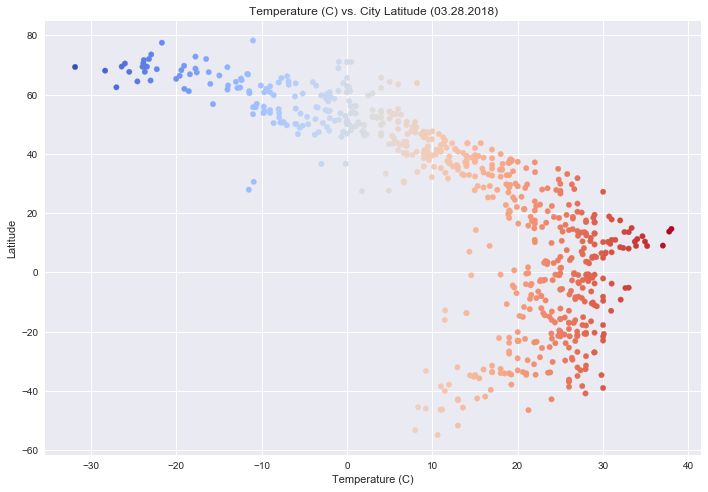

In [10]:
sns.set()
basedf = final_owm_df # DataFrame source for all plots can be easilly changed
current_date = datetime.datetime.now().date().strftime("%m.%d.%Y")
plt.figure(figsize=(10,7))
plt.scatter(basedf['Temperature(C)'], basedf['Latitude'], c=basedf['Temperature(C)'], s=30, cmap='coolwarm')
plt.ylabel('Latitude')
plt.xlabel('Temperature (C)')
plt.title(f'Temperature (C) vs. City Latitude ({current_date})')
plt.tight_layout()
plt.savefig(f'Output/Temp_vs_City Latitude_({current_date}).png')

**Latitude vs Humidity, Cloudiness and Wind Speed Plots**

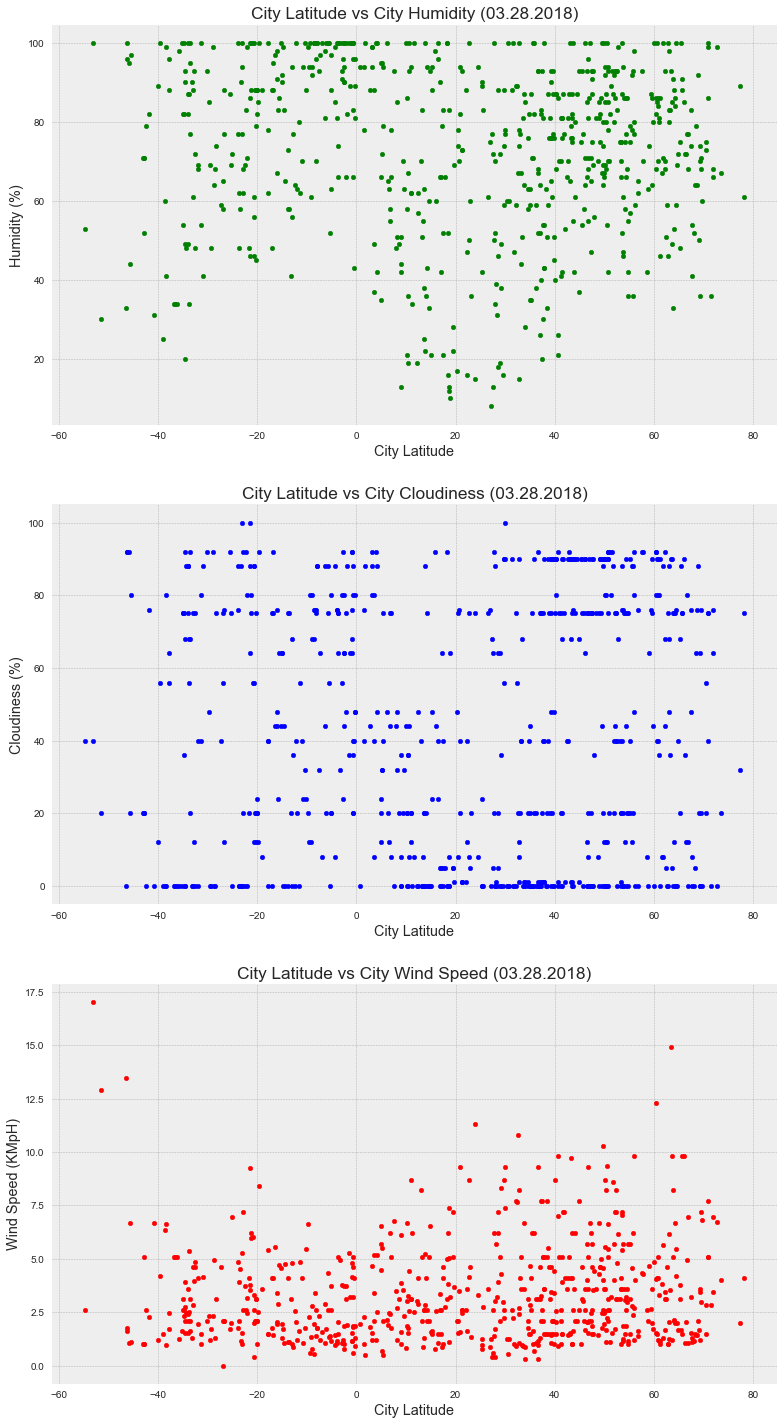

In [11]:
style.use('bmh')
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=False)
#ax1.set_xlim(min(df_weather['Latitude'])-16, max(df_weather['Latitude'])+20)
fig.set_size_inches(13,25)

ax1.scatter(basedf['Latitude'], basedf['Humidity(%)'], c='g', s=20)
ax1.set_xlabel('City Latitude')
ax1.set_ylabel('Humidity (%)')
ax1.set_title(f'City Latitude vs City Humidity ({current_date})')

ax2.scatter(basedf['Latitude'], basedf['Cloudiness(%)'], c='b', s=20)
ax2.set_xlabel('City Latitude')
ax2.set_ylabel('Cloudiness (%)')
ax2.set_title(f'City Latitude vs City Cloudiness ({current_date})')

ax3.scatter(basedf['Latitude'], basedf['Wind Speed(MpH)'], c='r', s=20)
ax3.set_xlabel('City Latitude')
ax3.set_ylabel('Wind Speed (KMpH)')
ax3.set_title(f'City Latitude vs City Wind Speed ({current_date})')
plt.savefig(f'Output/Latitude_vs_Humid_Cloud_Wind_({current_date}).png')